In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv


# Import Librarys

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv")

In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
print("df shape : ",df.shape)
print(">>>>>>>>>>>>>>>>>>>>>> \n")

print("df info : /n",df.info())
print(">>>>>>>>>>>>>>>>>>>>>> \n")

print("Cheak The Missing values: \n",df.isnull().sum())
print(">>>>>>>>>>>>>>>>>>>>>> \n")

print( df.describe())

df shape :  (583, 11)
>>>>>>>>>>>>>>>>>>>>>> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
df info : /n None
>>>>>>>>>>>>>>>>>>>>>> 

Cheak The Missing values: 
 age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins   

In [6]:
df.fillna(df["alkphos"].median(), inplace=True)


In [7]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


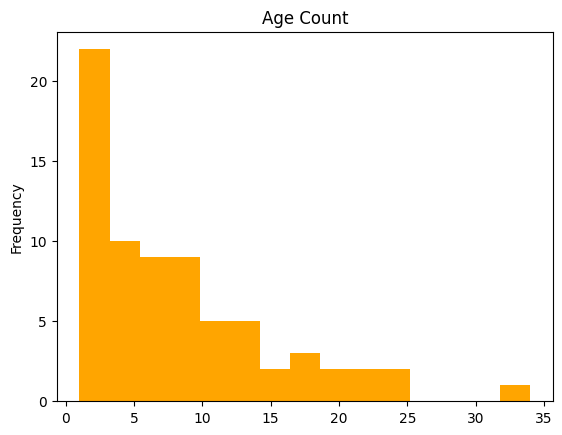

In [8]:
df["age"].value_counts().plot(kind = "hist",bins = 15,color = "orange")
plt.title("Age Count")
plt.show()

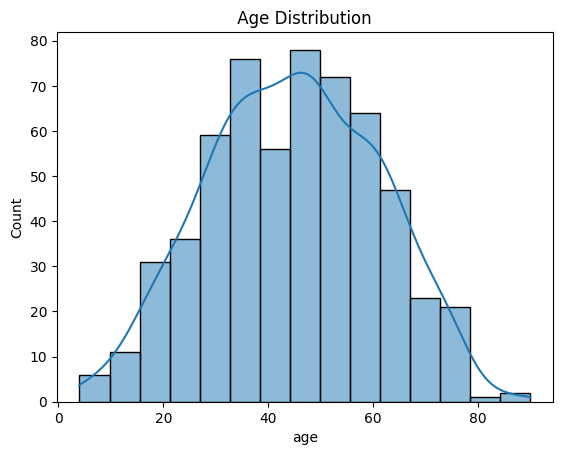

In [9]:
sns.histplot(df["age"],kde = True,bins=15)
plt.title(" Age Distribution ")
plt.show()

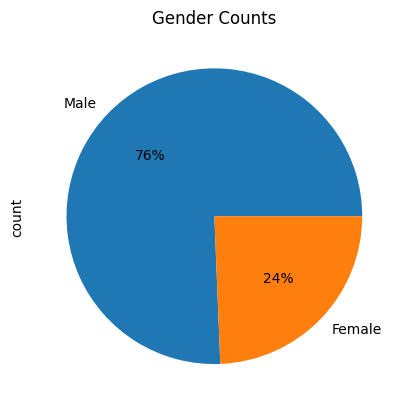

In [10]:
df["gender"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Gender Counts")
plt.show()

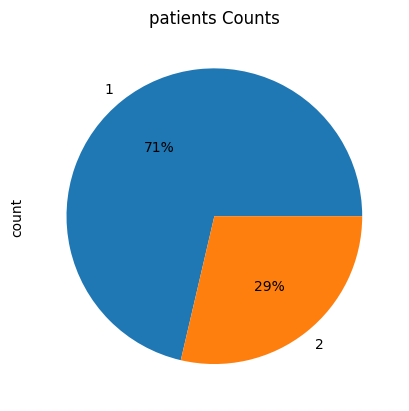

In [11]:
df["is_patient"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("patients Counts")
plt.show()

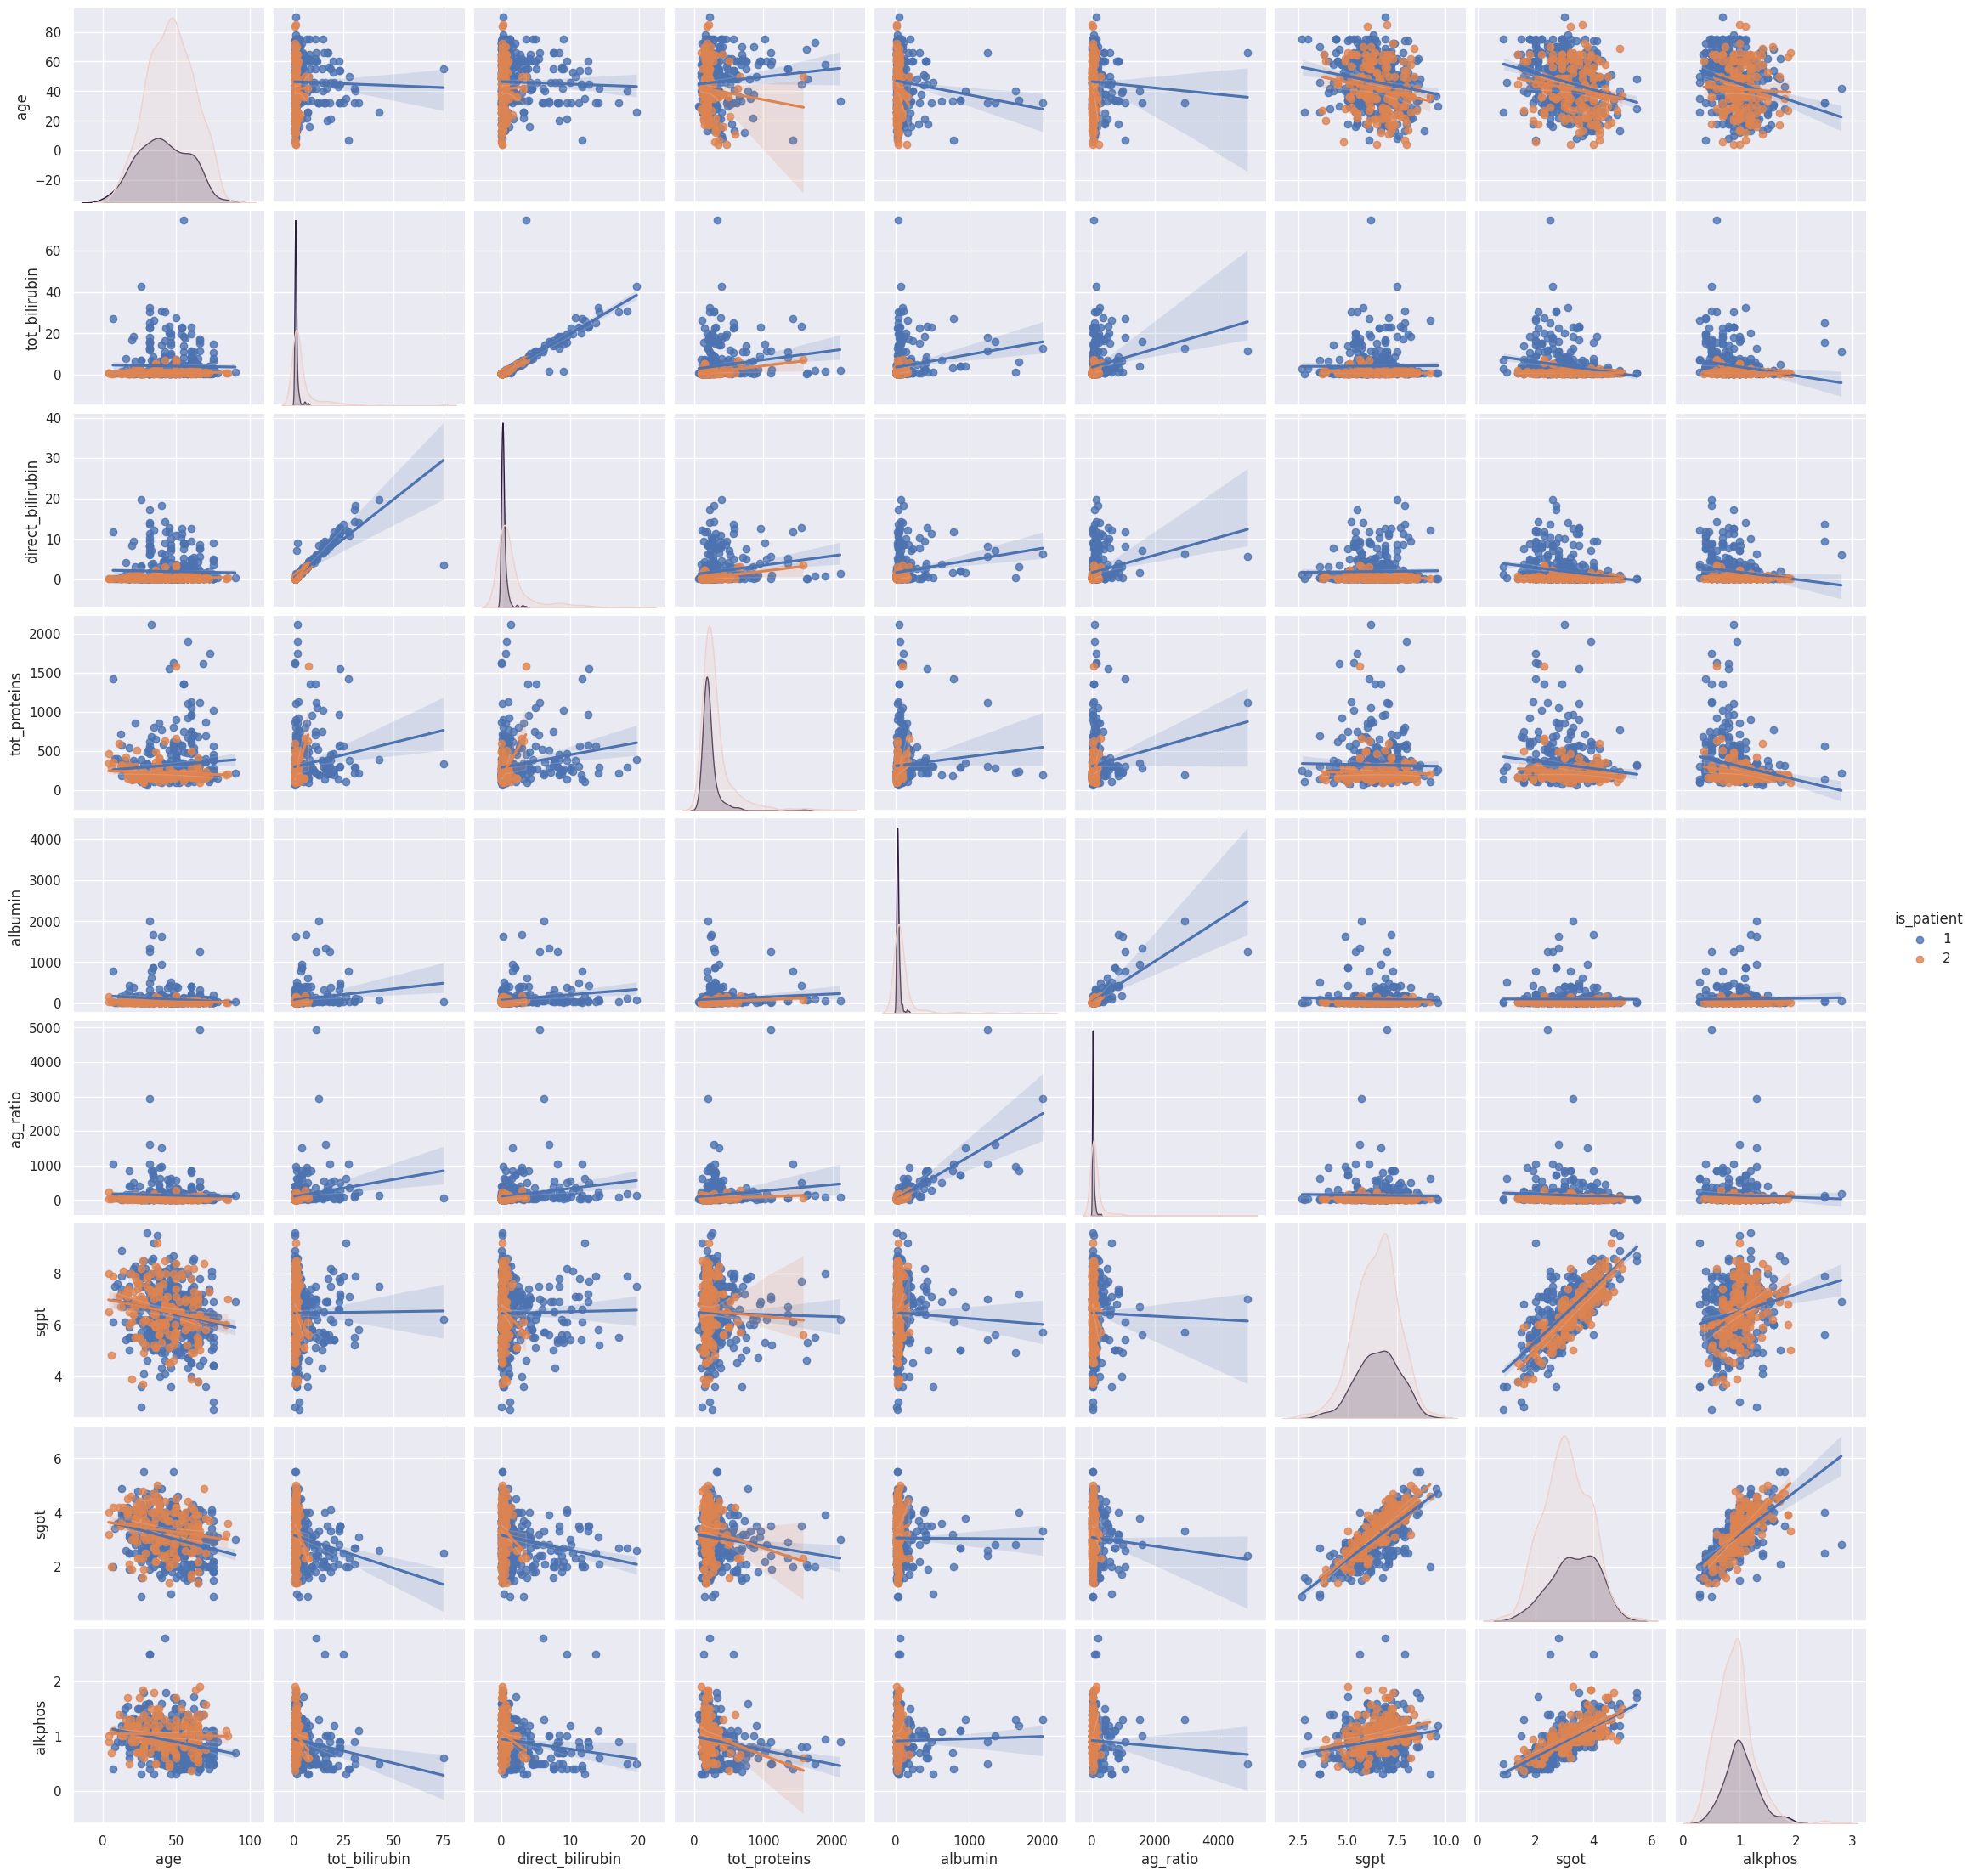

In [12]:
import seaborn as sns
#Implementing Pairplot to see the various mixtures
sns.set()
sns.pairplot(df, hue= 'is_patient', kind = 'reg')

#sns.pairplot(df_liver, hue='Dataset', kind='reg')

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

# Apply LabelEncoder directly on the 'gender' column
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])

# Continue with the rest of the transformations


In [14]:
x = df.drop(columns = ["is_patient"])
y = df["is_patient"]

In [15]:
scaler_df = StandardScaler()
x = pd.DataFrame(scaler_df. fit_transform(x),columns = x.columns)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=123)

In [17]:
print(x_train.isnull().sum())
print(y_train.isnull().sum())
print(x_test.isnull().sum())
print(y_test.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0


In [18]:
#Importing the Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [19]:
#Instantiating 3 Classification Models
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.14,random_state=1)
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
KNN_1 = KNN(n_neighbors = 10)
rf = RandomForestClassifier(n_estimators=25, random_state=2)

In [20]:
classifiers = [('Decision Tree',dt),('Logistic Regression',lr),('KNN',KNN_1), ('Random Forest', rf)]

In [21]:
dt.fit(x_train, y_train)
dt_y_pred = dt.predict(x_test)
dt_acc_test = accuracy_score(y_test, dt_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(dt_acc_test)) 

Test set accuracy of dt: 0.68


In [22]:
#Logistic Regression Accuracy
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(lr_acc_test))

Test set accuracy of dt: 0.72


In [23]:
#KNN Accuracy
KNN_1.fit(x_train, y_train)
knn_y_pred = KNN_1.predict(x_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(knn_acc_test)) 

Test set accuracy of dt: 0.64


In [24]:
#Random Forest Accuracy
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_acc_test = accuracy_score(y_test, rf_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(rf_acc_test)) 

Test set accuracy of dt: 0.67


In [25]:
#Decided to run them all together and print them out in a for loop for Automation
for clf_name, clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))


Decision Tree : 0.675
Logistic Regression : 0.718
KNN : 0.641
Random Forest : 0.667
